# Import the libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load the Data and preprocessing

In [2]:
diabetes_dataset=pd.read_csv(r"C:\Users\Administrator\Downloads\diabetes.csv")

In [3]:
# checking the first five rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Value counts for outcome labels
diabetes_dataset['Outcome'].value_counts()  

# 0----> Non-Diabetic
# 1----> Diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# Groupby mean of outcome with respect to other features
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Seperating the features and target labels in the dataset

In [8]:
X=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']

In [10]:
# printing input features
print(X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [11]:
# printing output labels
print(y.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


# Data Standardization

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
standardized_data = scaler.transform(X)

In [15]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X = standardized_data
y = diabetes_dataset['Outcome']

In [18]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Training and Testing spliting data

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
print("The shape of X training data :",X_train.shape)
print("The shape of y training data :",y_train.shape)
print("The shape of X test data :",X_test.shape)
print("The shape of y test data :",y_test.shape)

The shape of X training data : (614, 8)
The shape of y training data : (614,)
The shape of X test data : (154, 8)
The shape of y test data : (154,)


# Machine Learning Algorithm

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Model Evaluation

In [26]:
# Accuracy Score
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [27]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7719869706840391


In [37]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [38]:
print('Accuracy score of the testing data : ', test_data_accuracy)

Accuracy score of the testing data :  0.7792207792207793


# Confusion Matrix

array([[89, 24],
       [10, 31]], dtype=int64)

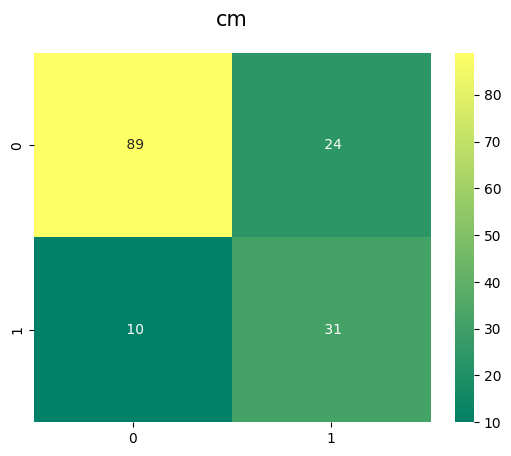

In [40]:
cm = confusion_matrix(X_test_prediction,y_test)
#visualize confusion matrix 
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

# Making a prediction on the data

In [42]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
